In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
from scipy import stats


In [2]:
from PyEyeSim import pyeyesim as pysim


In [3]:
#from PyEyeSim import pyeyesim_func_obj as pysim_o


In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
MemoryStudy=0
GenderStudy=1
Male=2
Mac=0  # set to 1 for macbook path, 0 for PC path
if GenderStudy:
    if Mac:
        if Male==1:
            Filepath='/Volumes/GoogleDrive/My Drive/Vienna/CreaLab/GenderProject/GenderIIMalePaint.csv'
        elif Male==0:
            Filepath='/Volumes/GoogleDrive/My Drive/Vienna/CreaLab/GenderProject/GenderIIFemalePaint.csv'
        elif Male==2:
            Filepath='/Volumes/GoogleDrive/My Drive/Vienna/CreaLab/GenderProject/GenderI.csv'

            
    else:
        if Male==1:
            Filepath='C:\\Users\\aratoj87\\Google Drive\\Vienna\\CreaLab\\GenderProject\\GenderIIMalePaint.csv'
        elif Male==0:   
            Filepath='C:\\Users\\aratoj87\\Google Drive\\Vienna\\CreaLab\\GenderProject\\GenderIIFemalePaint.csv'
        elif Male==2:
            Filepath='C:\\Users\\aratoj87\\Google Drive\\Vienna\\CreaLab\\GenderProject\\GenderI.csv'
    
    sizeX=2560
    sizeY=1600
     #StimN='Pa'
if MemoryStudy:
    if Mac:
        Filepath='/Users/jarato/Documents/EyeTracking/MemoryStudyFix.csv'
    else:
        Filepath='C:\\Users\\aratoj87\\Documents\\EyeTracking\\WilmKonigDatabase\\MemoryStudyFix.csv'
    sizeX=1280
    sizeY=960


FixData=pd.read_csv(Filepath)
if MemoryStudy:
    FixData=FixData[FixData['Repetition']==1]
   # StimN='Stimulus'


#
#fixData=pd.read_csv(Filepath)
FixData

Unnamed: 0  Unnamed: 0.1 subjectID                        subjectINFO  \
0                0             0     G_002  subjectID=G_002, dominant=RIGHT,    
1                1             2     G_002  subjectID=G_002, dominant=RIGHT,    
2                2             4     G_002  subjectID=G_002, dominant=RIGHT,    
3                3             6     G_002  subjectID=G_002, dominant=RIGHT,    
4                4             8     G_002  subjectID=G_002, dominant=RIGHT,    
...            ...           ...       ...                                ...   
163463      206561         19042    P87_VF                                NaN   
163464      206562         19044    P87_VF                                NaN   
163465      206563         19046    P87_VF                                NaN   
163466      206564         19048    P87_VF                                NaN   
163467      206565         19050    P87_VF                                NaN   

         picture     event  eventcode  gazepoints  cluster  onset(ms)  \
0       no image  fixation        0.0        19.0        0        0.0   
1       no image  fixation        0.0        15.0        0      183.0   
2       no image  fixation        0.0        28.0        0      316.0   
3       no image  fixation        0.0        31.0        0      591.0   
4       no image  fixation        0.0        13.0        0      891.0   
...          ...       ...        ...         ...      ...        ...   
163463  no image  fixation        0.0        20.0        0    59105.0   
163464  no image  fixation        0.0        15.0        0    59272.0   
163465  no image  fixation        0.0        14.0        0    59397.0   
163466  no image  fixation        0.0        16.0        0    59697.0   
163467  no image  fixation        0.0        13.0        0    59830.0   

        duration(ms)  mean_x  mean_y radius(px) saccade_length(px)  \
0              149.0    1293     801    22,4612                  .   
1              117.0    1290     794    17,0668                  .   
2              217.0    1218     514    35,2055                  .   
3              250.0    1058     439    20,9508                  .   
4              100.0    1957     871    32,7114                  .   
...              ...     ...     ...        ...                ...   
163463         159.0    1526     787    30,8357                  .   
163464         117.0    1512     836    28,5878                  .   
163465         108.0    1510     805    33,9456                  .   
163466         125.0    1588     723    38,4131                  .   
163467         100.0    1593     699    29,6587                  .   

       saccade_angle(°) Painting PartGend  
0                     .  Aertsen   Female  
1                     .  Aertsen   Female  
2                     .  Aertsen   Female  
3                     .  Aertsen   Female  
4                     .  Aertsen   Female  
...                 ...      ...      ...  
163463                .   Werner     Male  
163464                .   Werner     Male  
163465                .   Werner     Male  
163466                .   Werner     Male  
163467                .   Werner     Male  

[163468 rows x 18 columns]

## Test on last supper

In [5]:

Filepath='C:\\Users\\aratoj87\\Documents\\ArtHistory\\LastSupper\\Data\\AllFixations.csv'
Stimpath='C:\\Users\\aratoj87\\Documents\\ArtHistory\\Paintings\\'
sizeX= 2879
sizeY= 2159
FixData=pd.read_csv(Filepath)
FixData['duration']=FixData['CURRENT_FIX_END']-FixData['CURRENT_FIX_START']
FixData['image'] = FixData['image'].str.replace('jpg','png')
FixData

RECORDING_SESSION_LABEL  TRIAL_INDEX         image  CURRENT_FIX_START  \
0                         p10            1     Bouts.png                147   
1                         p10            1     Bouts.png                415   
2                         p10            1     Bouts.png                798   
3                         p10            1     Bouts.png                954   
4                         p10            1     Bouts.png               1716   
...                       ...          ...           ...                ...   
75224                      p9           14  Castagno.png              58941   
75225                      p9           14  Castagno.png              59130   
75226                      p9           14  Castagno.png              59458   
75227                      p9           14  Castagno.png              59699   
75228                      p9           14  Castagno.png              59866   

       CURRENT_FIX_END  CURRENT_FIX_X  CURRENT_FIX_Y  duration  
0                  369          839.8          845.6       222  
1                  760         1304.0         1041.9       345  
2                  930         1531.4         1050.6       132  
3                 1691         1466.5          957.8       737  
4                 1897         1330.0          957.5       181  
...                ...            ...            ...       ...  
75224            59090         1333.1         1239.0       149  
75225            59250         1228.8          996.7       120  
75226            59504         1243.6          950.4        46  
75227            59814         1123.9         1081.0       115  
75228            60051          229.2         1188.7       185  

[75229 rows x 8 columns]

In [6]:
LastSupperDat=pysim.EyeData('LastSupper','Single',FixData,sizeX,sizeY)


Fixation dataset LastSupper
dataset size:  (75229, 8)
study design:  Single
presentation size:  x= 2879 pixels y= 2159  pixels
presentation size:  x= 2879 pixels y= 2159  pixels
StimName  not found !!, provide column as StimName =YourColumn default Stimulus
SubjName  not found !!, provide column as SubjName =YourColumn default subjectID
mean_x  not found !!, provide column as mean_x =YourColumn default mean_x
mean_y  not found !!, provide column as mean_y =YourColumn default mean_y


In [7]:
LastSupperDat.DataInfo(StimName='image',StimPath=Stimpath,SubjName='RECORDING_SESSION_LABEL',mean_x='CURRENT_FIX_X',mean_y='CURRENT_FIX_Y',StimExt='')

info found for 33 subjects, and 14 stimuli
C:\Users\aratoj87\Documents\ArtHistory\Paintings\Barocci.png
C:\Users\aratoj87\Documents\ArtHistory\Paintings\Bouts.png
C:\Users\aratoj87\Documents\ArtHistory\Paintings\Castagno.png
C:\Users\aratoj87\Documents\ArtHistory\Paintings\Cranach.png
C:\Users\aratoj87\Documents\ArtHistory\Paintings\Ghirlandaio.png
C:\Users\aratoj87\Documents\ArtHistory\Paintings\Giotto.png
C:\Users\aratoj87\Documents\ArtHistory\Paintings\Juanes.png
C:\Users\aratoj87\Documents\ArtHistory\Paintings\Lessing.png
C:\Users\aratoj87\Documents\ArtHistory\Paintings\Lorenzetti.png
C:\Users\aratoj87\Documents\ArtHistory\Paintings\Netherlandish.png
C:\Users\aratoj87\Documents\ArtHistory\Paintings\Signorelli.png
C:\Users\aratoj87\Documents\ArtHistory\Paintings\Tintoretto_1578.png
C:\Users\aratoj87\Documents\ArtHistory\Paintings\Tintoretto_1592.png
C:\Users\aratoj87\Documents\ArtHistory\Paintings\Veronese.png
stimuli loaded succesfully, access as self.images


In [48]:
dir(LastSupperDat)

['BinnedCount',
 'CompareGroupsFix',
 'CompareGroupsHeatMap',
 'DataInfo',
 'Entropy',
 'FixCountCalc',
 'FixDurProg',
 'GetDurations',
 'GetEntropies',
 'GetFixationData',
 'GetGroups',
 'GetParams',
 'GetStimuli',
 'Heatmap',
 'InferSize',
 'RunDescriptiveFix',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'bounds',
 'boundsX',
 'boundsY',
 'data',
 'design',
 'durations',
 'images',
 'info',
 'len_scanpath',
 'meanfix_xy',
 'name',
 'nfix',
 'nfixations',
 'np',
 'ns',
 'sacc_ampl',
 'sdfix_xy',
 'stimuli',
 'subjects',
 'x_size',
 'y_size']

Data for  33 observers and  14  stimuli.
Barocci.png  Bound below zeroY found indicating out of stimulus area fixations-replaced with 0
Cranach.png  Bound below zeroY found indicating out of stimulus area fixations-replaced with 0
Ghirlandaio.png  Bound over x_size found indicating out of stimulus area fixations-replaced with 2879
Giotto.png  Bound below zeroY found indicating out of stimulus area fixations-replaced with 0
Lessing.png  Bound over y_size found indicating out of stimulus area fixations-replaced with 2159
Lorenzetti.png  Bound below zeroY found indicating out of stimulus area fixations-replaced with 0
Signorelli.png  Bound below zeroY found indicating out of stimulus area fixations-replaced with 0
Mean fixation number:  162.83  +/-  24.74
Mean fixation duration:  314.3  +/-  62.0 msec
Num of trials with zero fixations: 7
Num valid trials  455
Mean X location:  1434.4  +/-  44.9  pixels
Mean Y location:  1044.7  +/-  60.1  pixels
Mean saccade  amplitude:  306.3  +/-  44.2 

(array(['Barocci.png', 'Bouts.png', 'Castagno.png', 'Cranach.png',
        'Ghirlandaio.png', 'Giotto.png', 'Juanes.png', 'Lessing.png',
        'Lorenzetti.png', 'Netherlandish.png', 'Signorelli.png',
        'Tintoretto_1578.png', 'Tintoretto_1592.png', 'Veronese.png'],
       dtype=object),
 array(['p10', 'p11', 'p12', 'p13', 'p14', 'p15', 'p17', 'p18', 'p19',
        'p2', 'p20', 'p21', 'p23', 'p24', 'p25', 'p26', 'p27', 'p28',
        'p29', 'p3', 'p30', 'p31', 'p32', 'p32t', 'p34', 'p35', 'p36',
        'p37', 'p38', 'p39', 'p4', 'p6', 'p9'], dtype=object))

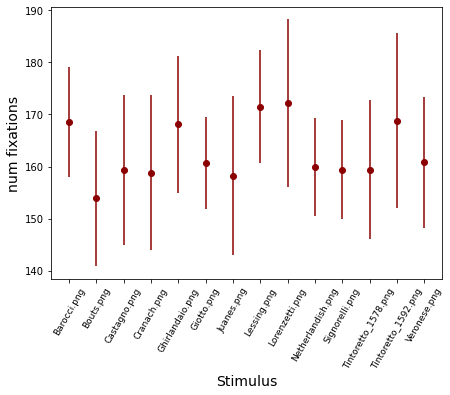

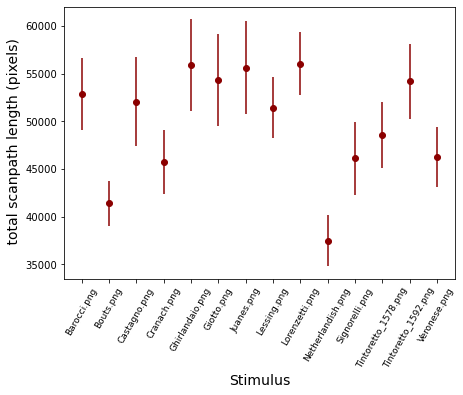

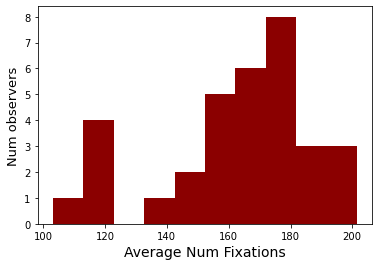

In [8]:
LastSupperDat.RunDescriptiveFix(Visual=1,duration=1)

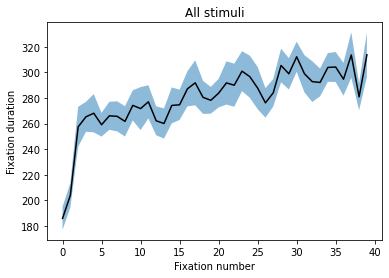

In [8]:
LastSupperDat.FixDurProg(40)

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

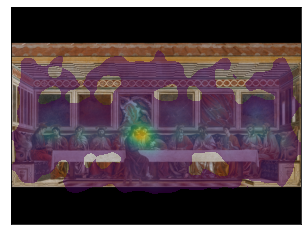

In [12]:
LastSupperDat.Heatmap('Castagno.png',Vis=1,SD=50,CutArea=0)

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

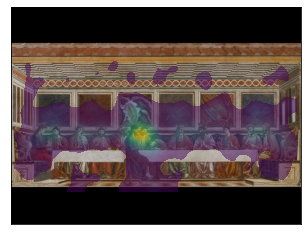

In [13]:
LastSupperDat.Heatmap('Castagno.png',Vis=1,SD=50,CutArea=1)

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

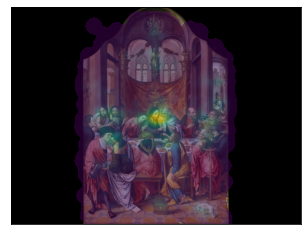

In [42]:
LastSupperDat.Heatmap('Netherlandish.png',Vis=1,cutoff='median')

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

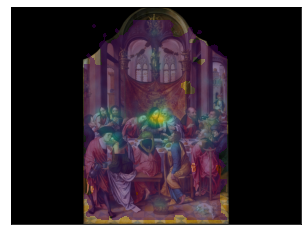

In [45]:
LastSupperDat.Heatmap('Netherlandish.png',Vis=1,cutoff=10,CutArea=1)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

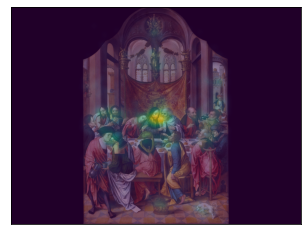

In [47]:
LastSupperDat.Heatmap('Netherlandish.png',Vis=1,cutoff=10,CutArea=0)

c:\users\aratoj87\documents\github\pyeyesim\PyEyeSim\pyeyesim.py:659: RuntimeWarning: divide by zero encountered in log2
  LogP=np.log2(StatP)
C:\Users\aratoj87\AppData\Local\Continuum\anaconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:1970: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


ValueError: could not broadcast input array from shape (33,14,3,3) into shape (33,14)

In [56]:
StatPMat,StatEntropyMat=LastSupperDat.CalcStatPs(10,10,InferS=1)

In [19]:
LastSupperDat.GetEntropies()

0 Barocci.png 6.71 maximum entropy 7.5


C:\Users\aratoj87\AppData\Local\Continuum\anaconda3\envs\tf\lib\site-packages\scipy\stats\_entropy.py:72: RuntimeWarning: invalid value encountered in true_divide
  pk = 1.0*pk / np.sum(pk, axis=axis, keepdims=True)


1 Bouts.png 6.08 maximum entropy 7.19
2 Castagno.png 6.51 maximum entropy 7.39
3 Cranach.png 6.39 maximum entropy 7.38
4 Ghirlandaio.png 6.74 maximum entropy 7.55
5 Giotto.png 6.44 maximum entropy 7.45
6 Juanes.png 6.55 maximum entropy 7.49
7 Lessing.png 6.05 maximum entropy 7.19
8 Lorenzetti.png 6.68 maximum entropy 7.57
9 Netherlandish.png 5.73 maximum entropy 7.02
10 Signorelli.png 6.12 maximum entropy 7.29
11 Tintoretto_1578.png 6.27 maximum entropy 7.19
12 Tintoretto_1592.png 6.64 maximum entropy 7.42
13 Veronese.png 5.74 maximum entropy 7.12


(array([6.71315528, 6.08032371, 6.51269211, 6.38973764, 6.73853941,
        6.44395248, 6.54904629, 6.04905988, 6.68136795, 5.72613246,
        6.11664641, 6.26862379, 6.63844671, 5.73887665]),
 array([7.4977617 , 7.19293422, 7.39264752, 7.37713371, 7.55171222,
        7.45124168, 7.48549161, 7.18538702, 7.56631101, 7.02108396,
        7.29301768, 7.19293422, 7.41697962, 7.11639414]),
 array([[4.22092169, 4.32287561, 4.31830696, 3.626784  , 4.34835285,
         4.34582876, 4.35494125, 4.03649317, 4.20919343, 3.66783163,
         3.64953536, 4.20502198,        nan, 3.69791422],
        [4.87361235, 4.406523  , 4.87713581, 4.9333263 , 4.77344722,
         4.55524538, 4.87962931, 4.6565318 , 4.9737036 , 4.32096355,
         4.40811653, 4.73470452, 4.89883135, 3.57938896],
        [4.76937333, 4.30405002, 4.60723595, 4.32390513, 4.71741019,
         4.3070258 , 4.84238313, 4.3146971 , 4.6768964 , 3.72828861,
         4.25955261, 4.38785072, 4.41979785, 3.48517542],
        [4.76095782, 4.3

In [57]:
StatPMat2,StatEntropyMat2=LastSupperDat.CalcStatPs(10,10,InferS=0)

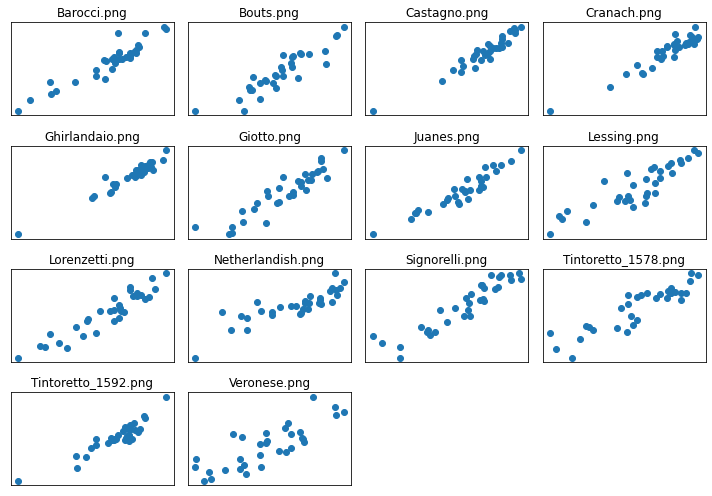

In [39]:
plt.figure(figsize=(10,7))

for cp,p in enumerate(LastSupperDat.stimuli):
    plt.subplot(4,4,cp+1)
    plt.scatter(StatEntropyMat[:,cp],StatEntropyMat2[:,cp])  #LastSupperDat.entropies_ind[:,cp])
    plt.xticks([])
    plt.yticks([])
    plt.title(p)
    
plt.tight_layout()

In [63]:
LastSupperDat.actsize

array([4692800, 3398549, 4141656, 4173912, 4853550, 4498065, 4570914,
       3385312, 4989276, 2888326, 3723069, 3424512, 4344360, 3152760],
      dtype=int64)

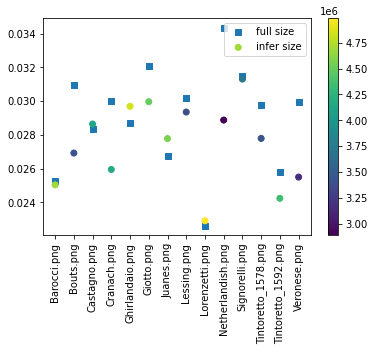

In [67]:
Diffs=LastSupperDat.StatPDiffInd(StatPMat2)
Diffs2=LastSupperDat.StatPDiffInd(StatPMat)
plt.scatter(np.arange(14),np.nanmean(np.nanmean(Diffs,1),1),label='full size',marker='s')
plt.scatter(np.arange(14),np.nanmean(np.nanmean(Diffs2,1),1),label='infer size',c=LastSupperDat.actsize)
plt.colorbar()
plt.xticks(np.arange(14),LastSupperDat.stimuli,rotation=90)
plt.legend()

### load dataset

In [22]:
MyDat=pysim.EyeData('GenderStudy','Within',FixData,sizeX,sizeY)

Fixation dataset GenderStudy
dataset size:  (51615, 13)
study design:  Within
presentation size:  x= 2560 pixels y= 1600  pixels
presentation size:  x= 2560 pixels y= 1600  pixels
StimName  not found !!, provide column as .DataInfo(StimName='YourColumn') default Stimulus
column found:  SubjName  default:  subjectID
column found:  mean_x  default:  mean_x
column found:  mean_y  default:  mean_y


In [5]:
MyDatMale=pysim.EyeData('GenderStudyMale','Within',FixData,sizeX,sizeY)
Stimpath='C:\\Users\\aratoj87\\Documents\\ArtHistory\\GenderProject\\Gender II_StudyDesign_Images\\Male Paintings\\'

MyDatMale.DataInfo(StimName='Painting',StimPath=Stimpath,StimExt='.jpg')

Fixation dataset GenderStudyMale
dataset size:  (52006, 11)
study design:  Within
presentation size:  x= 2560 pixels y= 1600  pixels
presentation size:  x= 2560 pixels y= 1600  pixels
StimName  not found !!, provide column as StimName =YourColumn default Stimulus
column found:  SubjName  default:  subjectID
column found:  mean_x  default:  mean_x
column found:  mean_y  default:  mean_y
info found for 56 subjects, and 12 stimuli
C:\Users\aratoj87\Documents\ArtHistory\GenderProject\Gender II_StudyDesign_Images\Male Paintings\Bronzino_Medici.jpg
C:\Users\aratoj87\Documents\ArtHistory\GenderProject\Gender II_StudyDesign_Images\Male Paintings\Capriolo_Selbstbildnis.jpg
C:\Users\aratoj87\Documents\ArtHistory\GenderProject\Gender II_StudyDesign_Images\Male Paintings\Caravaggio_Amor.jpg
C:\Users\aratoj87\Documents\ArtHistory\GenderProject\Gender II_StudyDesign_Images\Male Paintings\Freud_Mann.jpg
C:\Users\aratoj87\Documents\ArtHistory\GenderProject\Gender II_StudyDesign_Images\Male Paintings\G

In [22]:
MyDatGend1=pysim.EyeData('GenderStudyMale','Within',FixData,sizeX,sizeY)
Stimpath='C:\\Users\\aratoj87\\Documents\\ArtHistory\\GenderProject\\Gender1Paints\\'
MyDatGend1.DataInfo(StimName='Painting',StimPath=Stimpath,StimExt='.jpg')

Fixation dataset GenderStudyMale
dataset size:  (163468, 18)
study design:  Within
presentation size:  x= 2560 pixels y= 1600  pixels
presentation size:  x= 2560 pixels y= 1600  pixels
StimName  not found !!, provide column as StimName =YourColumn default Stimulus
column found:  SubjName  default:  subjectID
column found:  mean_x  default:  mean_x
column found:  mean_y  default:  mean_y
info found for 55 subjects, and 13 stimuli
C:\Users\aratoj87\Documents\ArtHistory\GenderProject\Gender1Paints\Aertsen.jpg
stimuli not found


Data for  55 observers and  13  stimuli.
Tilens  Bound over y_size found indicating out of stimulus area fixations-replaced with 1600
Mean fixation number:  228.63  +/-  35.83
fixation duration not asked for
Num of trials with zero fixations: 14
Num valid trials  701
Mean X location:  1265.0  +/-  51.3  pixels
Mean Y location:  885.2  +/-  62.1  pixels
Mean saccade  amplitude:  185.4  +/-  37.8  pixels
Mean scanpath  length:  41953.9  +/-  5570.2  pixels


(array(['Aertsen', 'Cezanne', 'Chardin', 'Cranach', 'David', 'Delacroix',
        'Goya', 'Oosterwijck', 'Ruisdael', 'Tilens', 'Waldmuller_Abschied',
        'Waldmuller_Vor', 'Werner'], dtype=object),
 array(['G_001', 'G_002', 'G_003', 'G_004', 'G_006', 'G_007', 'G_009',
        'G_010', 'G_011', 'G_014', 'G_016', 'G_017', 'G_019', 'G_020',
        'G_021', 'G_023', 'G_025', 'G_026', 'G_027', 'G_030', 'G_031',
        'G_033', 'G_034', 'G_036', 'G_037', 'G_038', 'G_039', 'G_042',
        'G_043', 'G_044', 'G_045', 'G_046', 'G_048', 'G_050', 'G_051',
        'G_053', 'G_054', 'G_055', 'G_056', 'G_057', 'G_058', 'G_059',
        'G_060', 'G_061', 'G_062', 'G_064', 'G_065', 'G_066', 'P72_VF',
        'P78_VF', 'P79_VF', 'P81_VF', 'P84_VF', 'P85_VF', 'P87_VF'],
       dtype=object))

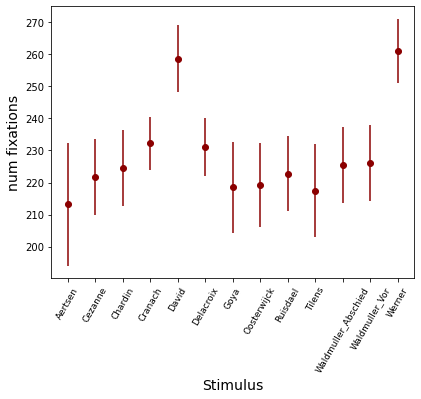

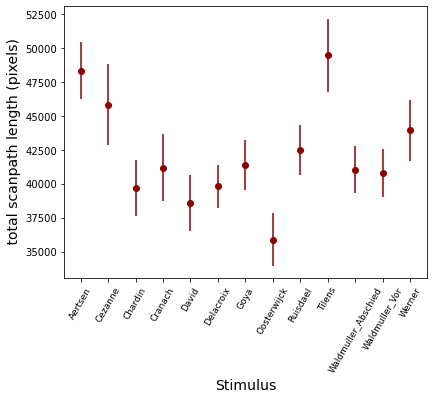

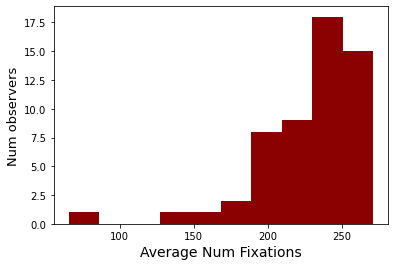

In [23]:
MyDatGend1.RunDescriptiveFix(Visual=1,duration=0)

### provide missing column name and stimulus path information

In [23]:
Path='C:\\Users\\aratoj87\\Documents\\ArtHistory\\GenderProject\\Gender II_StudyDesign_Images\\Female Paintings\\'

MyDat.DataInfo(StimName='Painting',StimPath=Path,StimExt='.jpg')

info found for 56 subjects, and 12 stimuli
stimuli loaded succesfully, access as self.images


### descriptive stats on group

Data for  56 observers and  12  stimuli.
Mean fixation number:  76.81  +/-  11.44
fixation duration not asked for
Num of trials with zero fixations: 1
Num valid trials  671
Mean X location:  1302.5  +/-  53.0  pixels
Mean Y location:  771.5  +/-  78.3  pixels
Mean saccade  amplitude:  185.3  +/-  37.2  pixels
Mean scanpath  length:  13723.8  +/-  2170.9  pixels


(array(['Bellini_Halbakt', 'Bouguereau_JungeFrau', 'Cranach_Venus',
        'David_Recamier', 'Gentileschi_Maria', 'Goya_MajaAngezogen',
        'Goya_MajaNacht', 'Ingres_Odaliske', 'Spiro_Halbakt',
        'Valadon_Selbstbildnis', 'VanLoo_JungeFrau',
        'Wittmann_Selbstbildnis'], dtype=object),
 array(['G_001', 'G_002', 'G_003', 'G_004', 'G_006', 'G_007', 'G_009',
        'G_010', 'G_011', 'G_014', 'G_016', 'G_017', 'G_019', 'G_020',
        'G_021', 'G_023', 'G_025', 'G_026', 'G_027', 'G_030', 'G_031',
        'G_033', 'G_034', 'G_036', 'G_037', 'G_038', 'G_039', 'G_042',
        'G_043', 'G_044', 'G_045', 'G_046', 'G_048', 'G_050', 'G_051',
        'G_053', 'G_054', 'G_055', 'G_056', 'G_057', 'G_058', 'G_059',
        'G_060', 'G_061', 'G_062', 'G_064', 'G_065', 'G_066', 'P72_VF',
        'P74_VF', 'P78_VF', 'P79_VF', 'P81_VF', 'P84_VF', 'P85_VF',
        'P87_VF'], dtype=object))

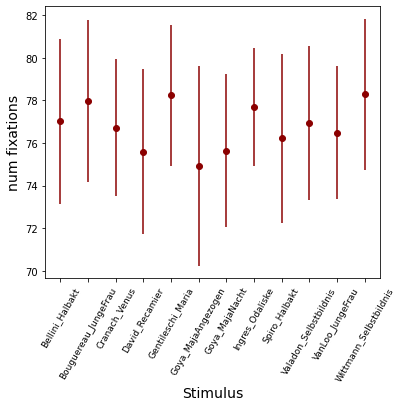

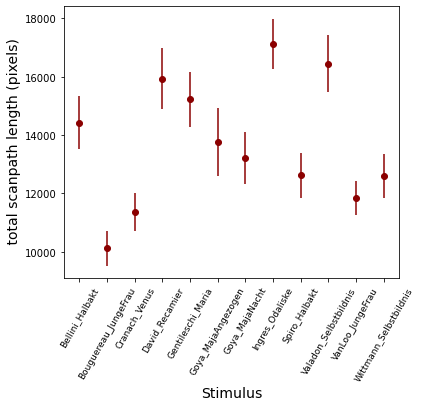

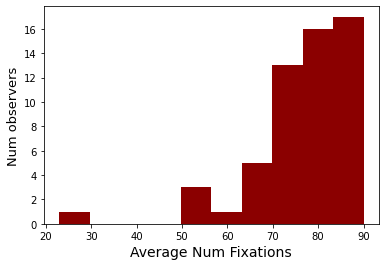

In [47]:
MyDat.RunDescriptiveFix(Visual=1,duration=0)

Conditions ['Female' 'Male']
0 Female Num fix=  228.36 +/- 43.23
0 Female Entropy=  4.45 +/- 0.18
0 Female tot scanpath len =  41859.86 +/- 5577.55 pix
0 Female saccade amplitude =  183.58 +/- 33.66 pix
1 Male Num fix=  228.87 +/- 27.56
1 Male Entropy=  4.49 +/- 0.12
1 Male tot scanpath len =  42038.26 +/- 5562.2 pix
1 Male saccade amplitude =  187.04 +/- 41.11 pix
 
Overall group differences: 
Entropy t= -0.8975 , p= 0.3735
Num Fix t= -0.0517 , p=  0.959
Scanpath lengths t= -0.1164 , p= 0.9078
Saccade amplitudes t= -0.3328 , p= 0.7406


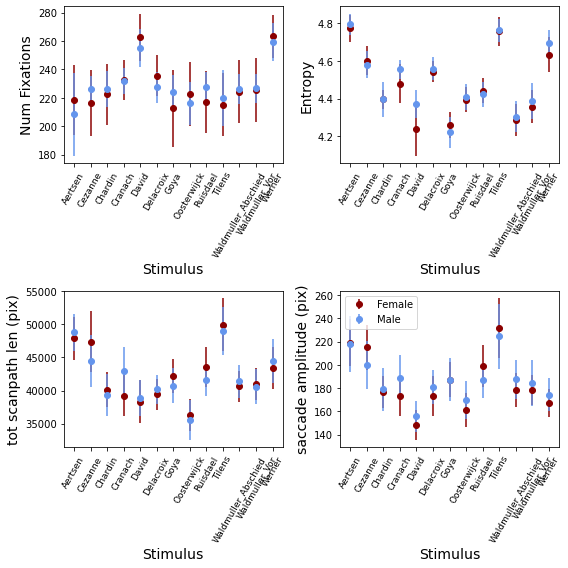

In [17]:
MyDatGend1.CompareGroupsFix('PartGend')

In [15]:
MyDatGend1.nfixations[nfix=]==

array([[252., 252., 227., 250., 298., 239., 248., 254., 267., 243., 249.,
        250., 269.],
       [250., 214., 238., 242., 236., 228., 202., 219., 218., 221., 224.,
        207., 249.],
       [138., 151., 153., 195., 280., 219., 201., 149., 142., 160., 203.,
        162., 198.],
       [264., 251., 249., 245., 287., 269., 235., 262., 254., 225., 271.,
        260., 313.],
       [ 94., 170.,  99., 155., 215., 123., 122., 105., 152., 104., 131.,
        144., 173.],
       [250., 243., 256., 257., 294., 272., 239., 232., 258., 245., 278.,
        258., 309.],
       [253., 263., 274., 263., 295., 240., 242., 264., 249., 250., 275.,
        269., 298.],
       [260., 249., 247., 255., 303., 264., 243., 256., 254., 247., 257.,
        259., 291.],
       [246., 247., 217., 235., 259., 246., 242., 249., 226., 239., 234.,
        242., 253.],
       [271., 221., 227., 237., 282., 257., 247., 227., 216., 239., 250.,
        253., 284.],
       [212., 210., 238., 223., 247., 191., 212., 

In [26]:
MyDatGend1.whichC

AttributeError: 'EyeData' object has no attribute 'whichC'

In [13]:
MyDatGend1.ns

55

Data for  55 observers and  13  stimuli.
Mean fixation number:  228.63  +/-  35.83
fixation duration not asked for
Num of trials with zero fixations: 14
Num valid trials  701
Mean X location:  1265.0  +/-  51.3  pixels
Mean Y location:  885.2  +/-  62.1  pixels
Mean saccade  amplitude:  185.4  +/-  37.8  pixels
Mean scanpath  length:  41953.9  +/-  5570.2  pixels


(array(['Aertsen', 'Cezanne', 'Chardin', 'Cranach', 'David', 'Delacroix',
        'Goya', 'Oosterwijck', 'Ruisdael', 'Tilens', 'Waldmuller_Abschied',
        'Waldmuller_Vor', 'Werner'], dtype=object),
 array(['G_001', 'G_002', 'G_003', 'G_004', 'G_006', 'G_007', 'G_009',
        'G_010', 'G_011', 'G_014', 'G_016', 'G_017', 'G_019', 'G_020',
        'G_021', 'G_023', 'G_025', 'G_026', 'G_027', 'G_030', 'G_031',
        'G_033', 'G_034', 'G_036', 'G_037', 'G_038', 'G_039', 'G_042',
        'G_043', 'G_044', 'G_045', 'G_046', 'G_048', 'G_050', 'G_051',
        'G_053', 'G_054', 'G_055', 'G_056', 'G_057', 'G_058', 'G_059',
        'G_060', 'G_061', 'G_062', 'G_064', 'G_065', 'G_066', 'P72_VF',
        'P78_VF', 'P79_VF', 'P81_VF', 'P84_VF', 'P85_VF', 'P87_VF'],
       dtype=object))

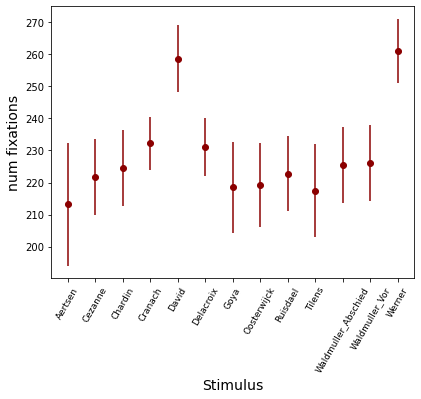

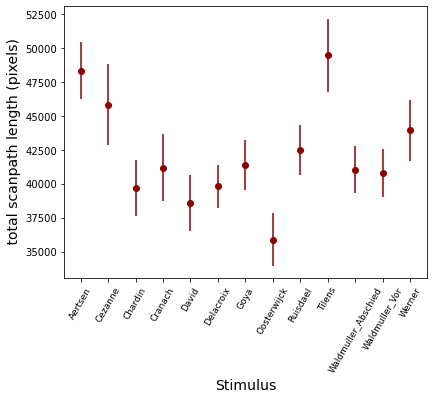

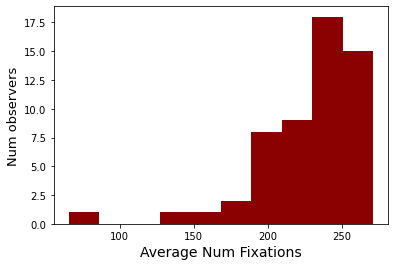

In [49]:
MyDatGend1.RunDescriptiveFix(Visual=1,duration=0)

## run group fixation descriptive comparison

In [24]:
MyDat.CompareGroupsFix('PartGend')

NameError: name 'MyDat' is not defined

Conditions ['Female' 'Male']
Calculating entropy
0 Bronzino_Medici 4.95 maximum entropy 6.51
1 Capriolo_Selbstbildnis 4.6 maximum entropy 6.45


C:\Users\aratoj87\AppData\Local\Continuum\anaconda3\envs\tf\lib\site-packages\scipy\stats\_entropy.py:72: RuntimeWarning: invalid value encountered in true_divide
  pk = 1.0*pk / np.sum(pk, axis=axis, keepdims=True)


2 Caravaggio_Amor 4.12 maximum entropy 6.3
3 Freud_Mann 5.31 maximum entropy 6.76
4 Giorgione_Jungling 4.28 maximum entropy 6.46
5 Girodet_Endymion 5.74 maximum entropy 7.0
6 Lanfranco_JungerMann 5.42 maximum entropy 6.92
7 Minardi_Selbsbildnis 5.33 maximum entropy 6.66
8 Ribera_Jakob 5.74 maximum entropy 7.11
9 Rubens_Ganymed 5.2 maximum entropy 6.73
10 Rubens_Herkules 5.07 maximum entropy 6.63
11 Tischbein_Goethe 5.43 maximum entropy 6.91
0 Female Num fix=  78.23 +/- 11.25
0 Female Entropy=  2.92 +/- 0.23
0 Female tot scanpath len =  14268.77 +/- 1703.92 pix
0 Female saccade amplitude =  190.69 +/- 38.83 pix
1 Male Num fix=  76.61 +/- 8.47
1 Male Entropy=  2.91 +/- 0.2
1 Male tot scanpath len =  14238.06 +/- 2114.36 pix
1 Male saccade amplitude =  190.7 +/- 29.44 pix
 
Overall group differences: 
Entropy t= 0.1601 , p= 0.8734
Num Fix t= 0.5999 , p=  0.5511
Scanpath lengths t= 0.0585 , p= 0.9536
Saccade amplitudes t= -0.0011 , p= 0.9991


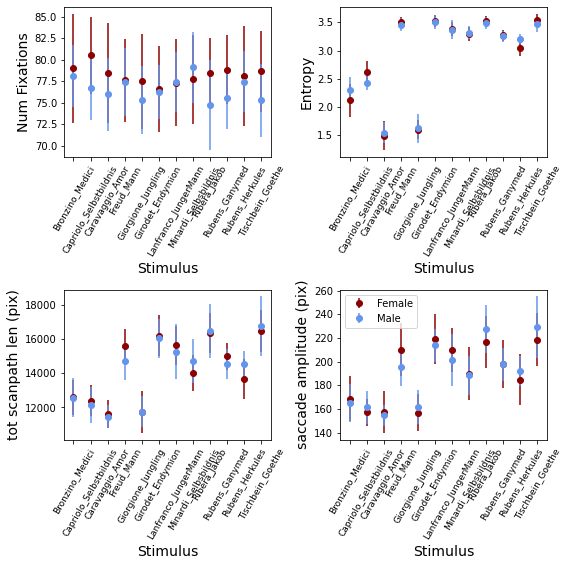

In [7]:
MyDatMale.CompareGroupsFix('PartGend')

Conditions ['Female' 'Male']
Calculating entropy


/Users/jarato/opt/anaconda3/envs/pymc_env/lib/python3.10/site-packages/scipy/stats/_entropy.py:77: RuntimeWarning: invalid value encountered in true_divide
  pk = 1.0*pk / np.sum(pk, axis=axis, keepdims=True)


0 Aertsen 6.55 maximum entropy 7.13
1 Cezanne 6.15 maximum entropy 6.87
2 Chardin 5.74 maximum entropy 6.83
3 Cranach 6.15 maximum entropy 7.09
4 David 5.7 maximum entropy 6.87
5 Delacroix 6.14 maximum entropy 6.97
6 Goya 5.59 maximum entropy 6.82
7 Oosterwijck 5.85 maximum entropy 6.82
8 Ruisdael 5.97 maximum entropy 6.89
9 Tilens 6.49 maximum entropy 7.18
10 Waldmuller_Abschied 5.8 maximum entropy 6.97
11 Waldmuller_Vor 6.0 maximum entropy 6.92
12 Werner 6.21 maximum entropy 7.06
0 Female Num fix=  228.36 +/- 43.23
0 Female Entropy=  4.45 +/- 0.18
0 Female tot scanpath len =  41859.86 +/- 5577.55 pix
0 Female saccade amplitude =  183.58 +/- 33.66 pix
1 Male Num fix=  228.87 +/- 27.56
1 Male Entropy=  4.49 +/- 0.12
1 Male tot scanpath len =  42038.26 +/- 5562.2 pix
1 Male saccade amplitude =  187.04 +/- 41.11 pix
 
Overall group differences: 
Entropy t= -0.8975 , p= 0.3735
Num Fix t= -0.0517 , p=  0.959
Scanpath lengths t= -0.1164 , p= 0.9078
Saccade amplitudes t= -0.3328 , p= 0.7406


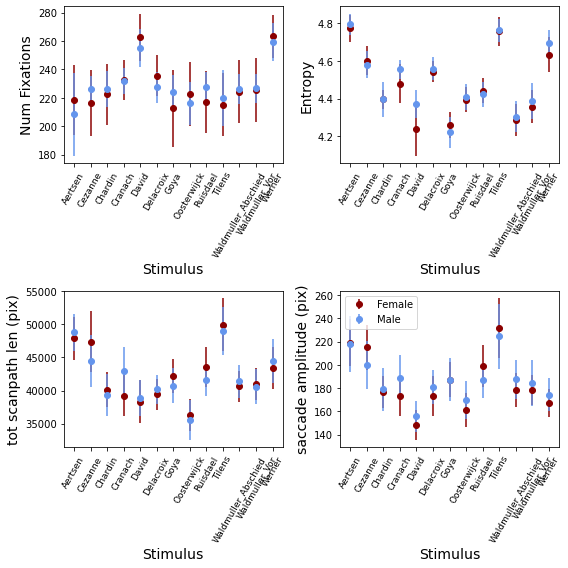

In [25]:
MyDatGend1.CompareGroupsFix('PartGend')

In [38]:
MyDat.NFix.to_pandas().to_csv('C:\\Users\\aratoj87\\Documents\\ArtHistory\\NumFix.csv')

In [18]:
FixCountInd=MyDat.FixCountCalc('Bellini_Halbakt')


In [33]:
MyDat.Conds

array(['Female', 'Male'], dtype=object)

In [56]:
MyDat.GetStimuli('C:\\Users\\aratoj87\\Documents\\ArtHistory\\GenderProject\\Gender II_StudyDesign_Images\\Female Paintings\\')

Conditions ['Female' 'Male']


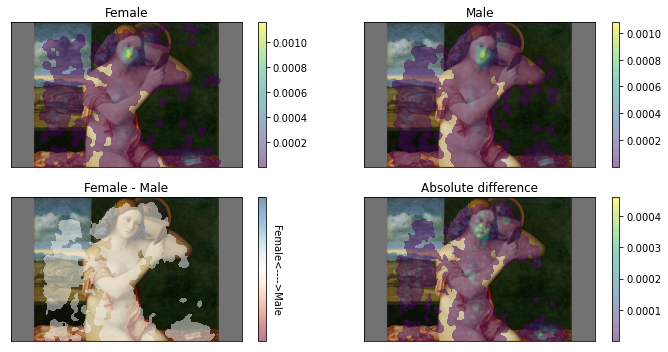

In [88]:
MyDat.CompareGroupsHeatMap(Stim='Bellini_Halbakt',betwcond='PartGend',SD=15)

Conditions ['Female' 'Male']


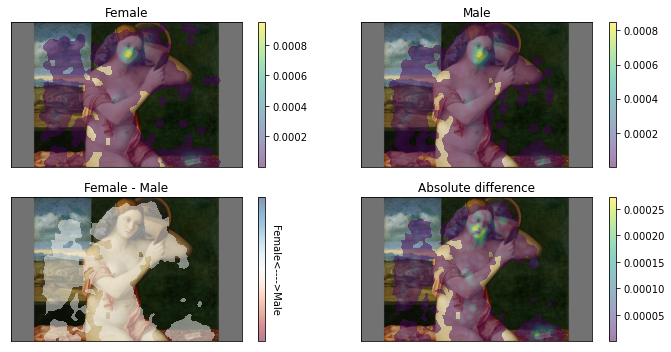

In [83]:
MyDat.CompareGroupsHeatMap(Stim='Bellini_Halbakt',betwcond='PartGend')

Conditions ['Female' 'Male']
use provided conditions:  ['Male', 'Female']


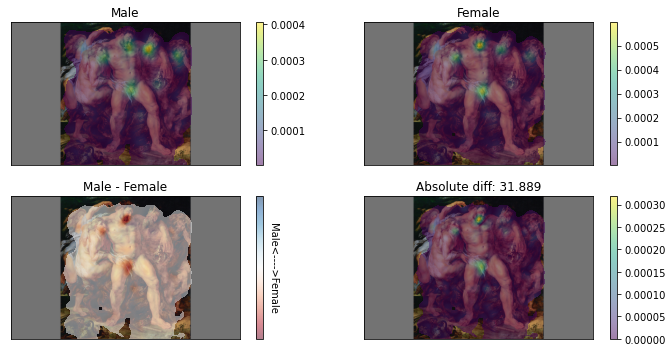

In [31]:
MyDatMale.CompareGroupsHeatMap(Stim='Rubens_Herkules',betwcond='PartGend',SD=30,CutArea=0,Conds=['Male','Female'])# 

Conditions ['Female' 'Male']
use provided conditions:  ['Male', 'Female']
['Male' 'Female' 'Female' 'Female' 'Male' 'Female' 'Male' 'Male' 'Female'
 'Male' 'Male' 'Male' 'Female' 'Female' 'Male' 'Male' 'Female' 'Male'
 'Female' 'Female' 'Male' 'Female' 'Female' 'Male' 'Male' 'Female'
 'Female' 'Female' 'Female' 'Female' 'Female' 'Female' 'Male' 'Male'
 'Female' 'Male' 'Male' 'Female' 'Female' 'Female' 'Female' 'Male' 'Male'
 'Male' 'Female' 'Male' 'Male' 'Male' 'Female' 'Female' 'Male' 'Male'
 'Male' 'Male' 'Male' 'Male']
0 Male
[ 0  4  6  7  9 10 11 14 15 17 20 23 24 32 33 35 36 41 42 43 45 46 47 50
 51 52 53 54 55]
1 Female
[ 1  2  3  5  8 12 13 16 18 19 21 22 25 26 27 28 29 30 31 34 37 38 39 40
 44 48 49]


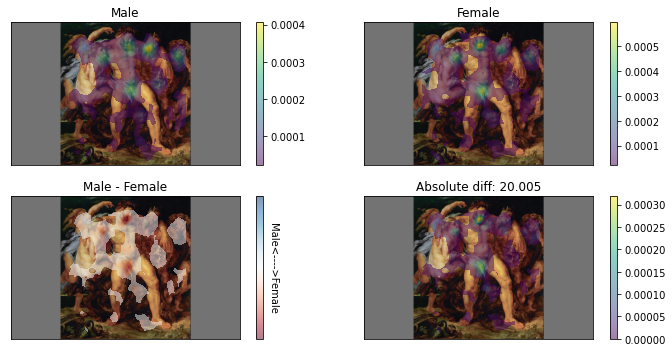

In [34]:
MyDatMale.CompareGroupsHeatMap(Stim='Rubens_Herkules',betwcond='PartGend',SD=30,CutArea=1,Conds=['Male','Female'])# 

In [28]:
np.unique(MyDatMale.data['PartGend'])

array(['Female', 'Male'], dtype=object)

Conditions ['Female' 'Male']
Conditions ['Female' 'Male']
Conditions ['Female' 'Male']
Conditions ['Female' 'Male']
Conditions ['Female' 'Male']
Conditions ['Female' 'Male']
Conditions ['Female' 'Male']
Conditions ['Female' 'Male']
Conditions ['Female' 'Male']
Conditions ['Female' 'Male']
Conditions ['Female' 'Male']
Conditions ['Female' 'Male']


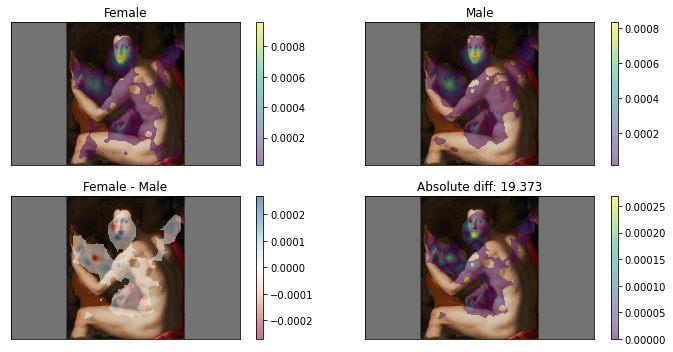

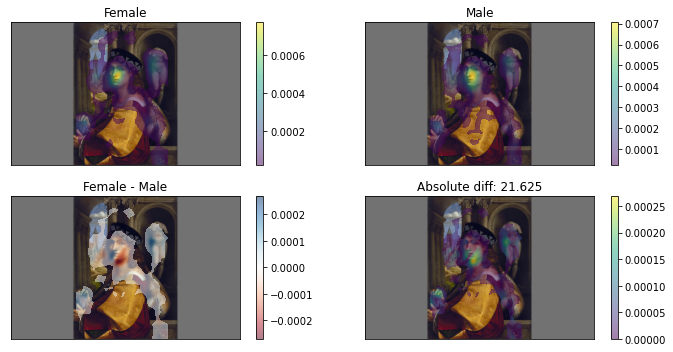

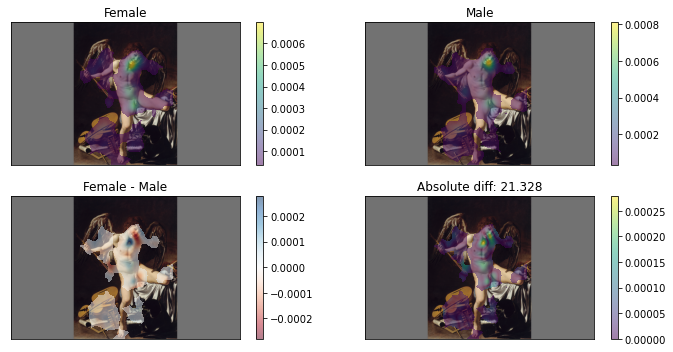

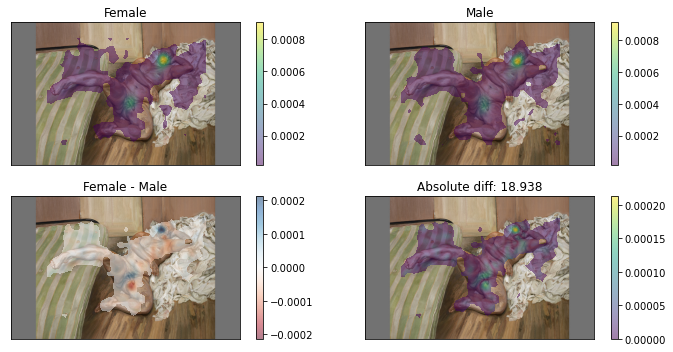

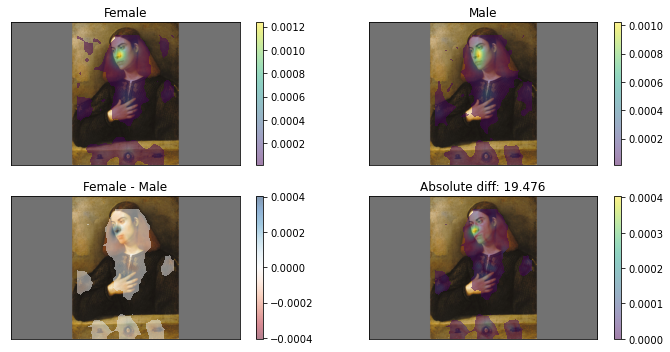

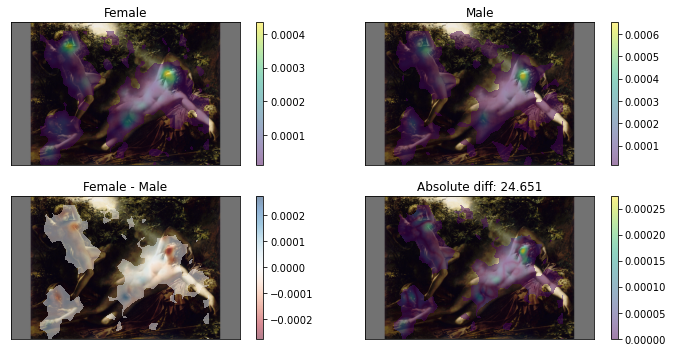

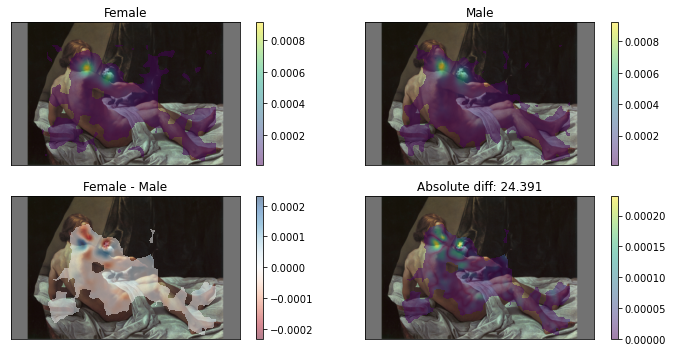

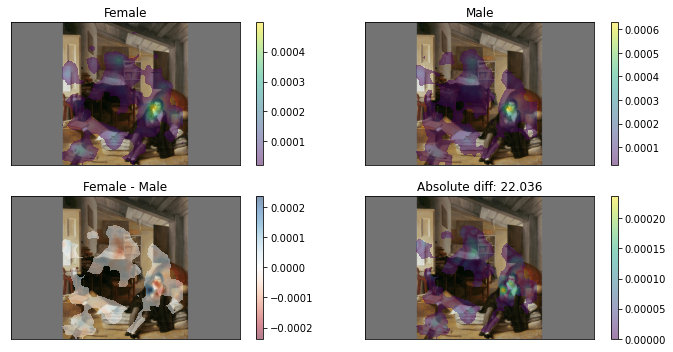

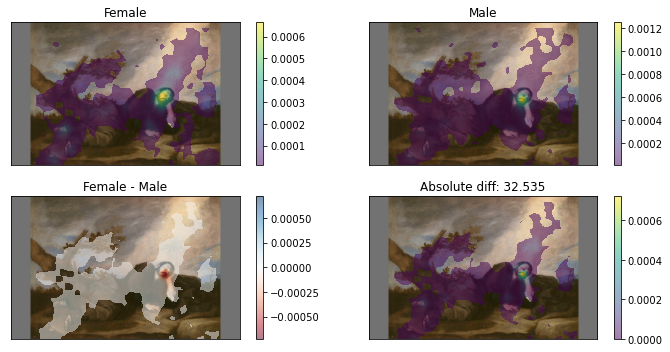

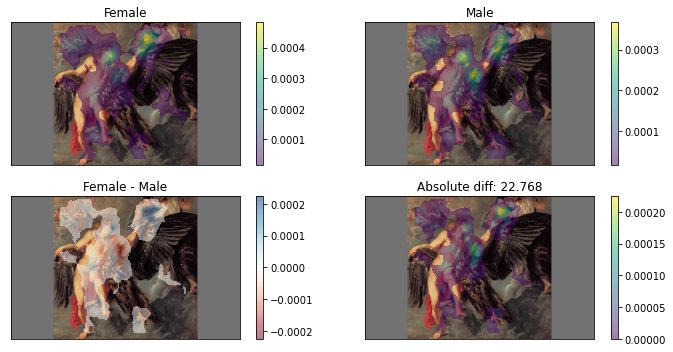

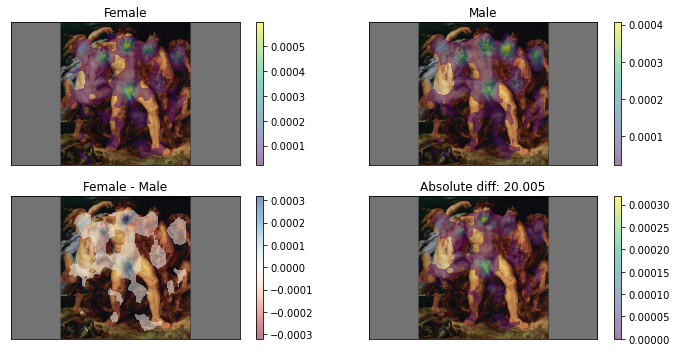

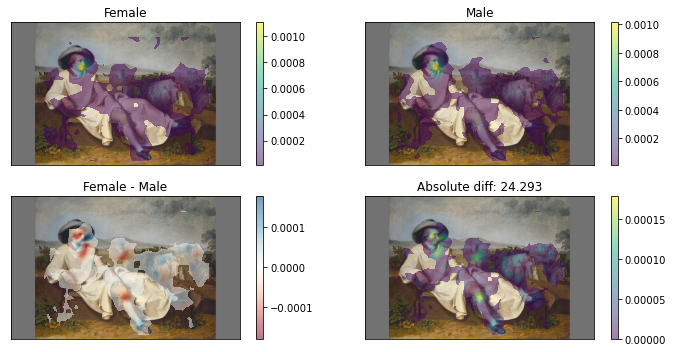

In [67]:
for cs,s in enumerate(MyDatMale.stimuli):
    MyDatMale.CompareGroupsHeatMap(Stim=s,betwcond='PartGend',SD=30,CutArea=1)# 

Conditions ['Female' 'Male']
['Male' 'Female' 'Female' 'Female' 'Male' 'Female' 'Male' 'Male' 'Female'
 'Male' 'Male' 'Male' 'Female' 'Female' 'Male' 'Male' 'Female' 'Male'
 'Female' 'Female' 'Male' 'Female' 'Female' 'Male' 'Male' 'Female'
 'Female' 'Female' 'Female' 'Female' 'Female' 'Female' 'Male' 'Male'
 'Female' 'Male' 'Male' 'Female' 'Female' 'Female' 'Female' 'Male' 'Male'
 'Male' 'Female' 'Male' 'Male' 'Male' 'Female' 'Female' 'Male' 'Male'
 'Male' 'Male' 'Male' 'Male']
0 Female
[ 1  2  3  5  8 12 13 16 18 19 21 22 25 26 27 28 29 30 31 34 37 38 39 40
 44 48 49]
1 Male
[ 0  4  6  7  9 10 11 14 15 17 20 23 24 32 33 35 36 41 42 43 45 46 47 50
 51 52 53 54 55]
Conditions ['Female' 'Male']
['Male' 'Female' 'Female' 'Female' 'Male' 'Female' 'Male' 'Male' 'Female'
 'Male' 'Male' 'Male' 'Female' 'Female' 'Male' 'Male' 'Female' 'Male'
 'Female' 'Female' 'Male' 'Female' 'Female' 'Male' 'Male' 'Female'
 'Female' 'Female' 'Female' 'Female' 'Female' 'Female' 'Male' 'Male'
 'Female' 'Male' '

KeyboardInterrupt: 

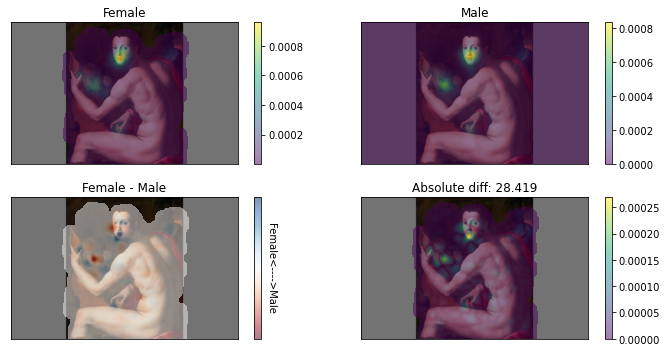

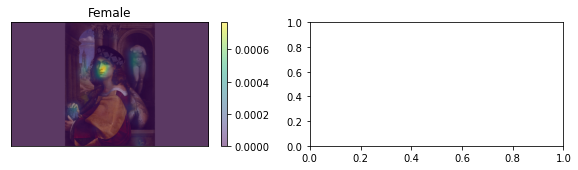

In [33]:
for cs,s in enumerate(MyDatMale.stimuli):
    MyDatMale.CompareGroupsHeatMap(Stim=s,betwcond='PartGend',SD=30,CutArea=0)# 

In [42]:
MyDat.stimuli

array(['Bellini_Halbakt', 'Bouguereau_JungeFrau', 'Cranach_Venus',
       'David_Recamier', 'Gentileschi_Maria', 'Goya_MajaAngezogen',
       'Goya_MajaNacht', 'Ingres_Odaliske', 'Spiro_Halbakt',
       'Valadon_Selbstbildnis', 'VanLoo_JungeFrau',
       'Wittmann_Selbstbildnis'], dtype=object)

### Heatmap

In [9]:
MyDat.Heatmap('Bellini_Halbakt',SD=50,Vis=1)

NameError: name 'MyDat' is not defined

### individual differences fixations map

In [26]:
statsPs,statEntrs=LastSupperDat.CalcStatPs(40,40)
StatIndDiff=LastSupperDat.StatPDiffInd(statsPs)

In [27]:
np.shape(StatIndDiff)

(14, 33, 33)

In [29]:
np.shape(statsPs)

(33, 14, 40, 40)

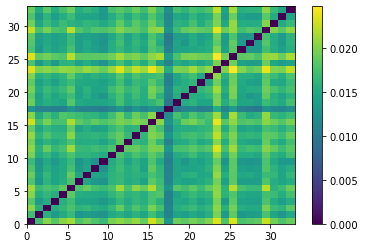

In [30]:
plt.pcolor(np.nanmean(StatIndDiff[:,:,:],0))
plt.colorbar()

c:\users\aratoj87\documents\github\pyeyesim\PyEyeSim\pyeyesim.py:684: RuntimeWarning: divide by zero encountered in log2
  LogP=np.log2(StatP)


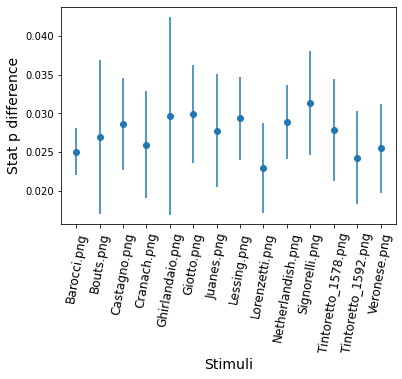

In [42]:
LastSupperDat.GetInddiff(10,10,Vis=1)

c:\users\aratoj87\documents\github\pyeyesim\PyEyeSim\pyeyesim.py:728: RuntimeWarning: divide by zero encountered in log2
  LogP=np.log2(StatP)


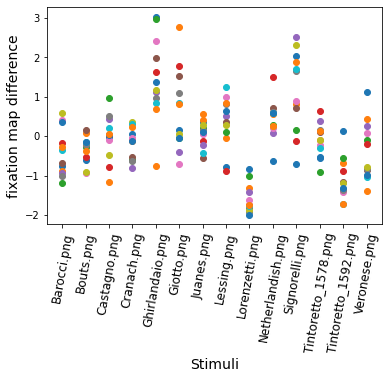

In [9]:
plt.figure()
for divs in np.arange(3,15):
    LastSupperDat.GetInddiff(divs,divs,Vis=1,zscore=1)

c:\users\aratoj87\documents\github\pyeyesim\PyEyeSim\pyeyesim.py:728: RuntimeWarning: divide by zero encountered in log2
  LogP=np.log2(StatP)


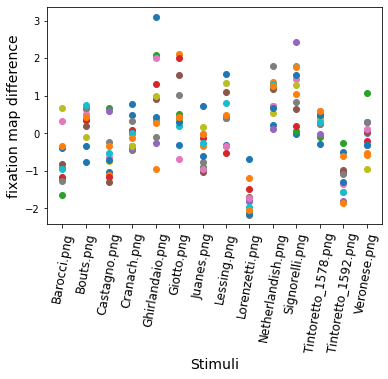

In [11]:
plt.figure()
for divs in np.arange(3,15):
    LastSupperDat.GetInddiff(divs,divs,Vis=1,zscore=1,InferS=0)

c:\users\aratoj87\documents\github\pyeyesim\PyEyeSim\pyeyesim.py:743: RuntimeWarning: divide by zero encountered in log2
  LogP=np.log2(StatP)


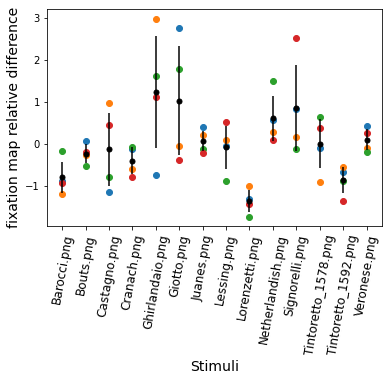

In [22]:

zdiffs,diffs=LastSupperDat.RunDiffDivs(4,8,Vis=1)



In [15]:
zdiffs

array([[-0.95892323, -0.95892323, -0.95892323],
       [ 0.54493717,  0.54493717,  0.54493717],
       [ 0.679543  ,  0.679543  ,  0.679543  ],
       [-1.00594731, -1.00594731, -1.00594731],
       [ 1.33350422,  1.33350422,  1.33350422],
       [-0.28505249, -0.28505249, -0.28505249],
       [ 0.49328864,  0.49328864,  0.49328864],
       [ 0.03163788,  0.03163788,  0.03163788],
       [-1.87767183, -1.87767183, -1.87767183],
       [-0.42407989, -0.42407989, -0.42407989],
       [ 2.27296542,  2.27296542,  2.27296542],
       [-0.31128594, -0.31128594, -0.31128594],
       [-0.48700828, -0.48700828, -0.48700828],
       [-0.00590737, -0.00590737, -0.00590737]])

In [54]:
np.shape(LastSupperDat.FixCountCalc('Netherlandish.png',CutAct=1))

(33, 2003, 1442)

In [55]:
np.shape(LastSupperDat.FixCountCalc('Netherlandish.png',CutAct=0))

(33, 2159, 2879)

In [52]:
LastSupperDat.GetBinnedStimFixS(size=60,fixs=1)

Barocci.png (33, 2159, 2879)
Barocci.png p10
(35, 47)
Barocci.png p11
(35, 47)
Barocci.png p12
(35, 47)
Barocci.png p13
(35, 47)
Bouts.png (33, 2159, 2879)
Bouts.png p10
(35, 47)
Bouts.png p11
(35, 47)
Bouts.png p12
(35, 47)
Bouts.png p13
(35, 47)
Castagno.png (33, 2159, 2879)
Castagno.png p10
(35, 47)
Castagno.png p11
(35, 47)
Castagno.png p12
(35, 47)
Castagno.png p13
(35, 47)
Cranach.png (33, 2159, 2879)
Cranach.png p10
(35, 47)
Cranach.png p11
(35, 47)
Cranach.png p12
(35, 47)
Cranach.png p13
(35, 47)
Ghirlandaio.png (33, 2159, 2879)
Ghirlandaio.png p10
(35, 47)
Ghirlandaio.png p11
(35, 47)
Ghirlandaio.png p12
(35, 47)
Ghirlandaio.png p13
(35, 47)
Giotto.png (33, 2159, 2879)
Giotto.png p10
(35, 47)
Giotto.png p11
(35, 47)
Giotto.png p12
(35, 47)
Giotto.png p13
(35, 47)
Juanes.png (33, 2159, 2879)
Juanes.png p10
(35, 47)
Juanes.png p11
(35, 47)
Juanes.png p12
(35, 47)
Juanes.png p13
(35, 47)
Lessing.png (33, 2159, 2879)
Lessing.png p10
(35, 47)
Lessing.png p11
(35, 47)
Lessing.png p

In [57]:
LastSupperDat.GetBinnedStimFixS(size=60,fixs=0)

Barocci.png (33, 2159, 2879)
Barocci.png p11
(34, 37)
Bouts.png (33, 2159, 2879)
Bouts.png p11
(31, 29)
Castagno.png (33, 2159, 2879)
Castagno.png p11
(24, 47)
Cranach.png (33, 2159, 2879)
Cranach.png p11
(34, 33)
Ghirlandaio.png (33, 2159, 2879)
Ghirlandaio.png p11
(28, 47)
Giotto.png (33, 2159, 2879)
Giotto.png p11
(35, 34)
Juanes.png (33, 2159, 2879)
Juanes.png p11
(27, 45)
Lessing.png (33, 2159, 2879)
Lessing.png p11
(33, 27)
Lorenzetti.png (33, 2159, 2879)
Lorenzetti.png p11
(35, 39)
Netherlandish.png (33, 2159, 2879)
Netherlandish.png p11
(33, 24)
Signorelli.png (33, 2159, 2879)
Signorelli.png p11
(35, 29)
Tintoretto_1578.png (33, 2159, 2879)
Tintoretto_1578.png p11
(31, 29)
Tintoretto_1592.png (33, 2159, 2879)
Tintoretto_1592.png p11
(27, 44)
Veronese.png (33, 2159, 2879)
Veronese.png p11
(18, 46)


In [59]:
LastSupperDat.GetBinnedStimFixS(size=60,fixs=0)

Barocci.png (33, 2095, 2240)
hor  [ 368  428  488  548  608  668  728  788  848  908  968 1028 1088 1148
 1208 1268 1328 1388 1448 1508 1568 1628 1688 1748 1808 1868 1928 1988
 2048 2108 2168 2228 2288 2348 2408 2468 2528]  ver  [  60  120  180  240  300  360  420  480  540  600  660  720  780  840
  900  960 1020 1080 1140 1200 1260 1320 1380 1440 1500 1560 1620 1680
 1740 1800 1860 1920 1980 2040]
Barocci.png p10
(34, 37)
hor  [ 368  428  488  548  608  668  728  788  848  908  968 1028 1088 1148
 1208 1268 1328 1388 1448 1508 1568 1628 1688 1748 1808 1868 1928 1988
 2048 2108 2168 2228 2288 2348 2408 2468 2528]  ver  [  60  120  180  240  300  360  420  480  540  600  660  720  780  840
  900  960 1020 1080 1140 1200 1260 1320 1380 1440 1500 1560 1620 1680
 1740 1800 1860 1920 1980 2040]
Barocci.png p11
(34, 37)
Bouts.png (33, 1919, 1771)
hor  [ 638  698  758  818  878  938  998 1058 1118 1178 1238 1298 1358 1418
 1478 1538 1598 1658 1718 1778 1838 1898 1958 2018 2078 2138 2198 2258

Tintoretto_1578.png (33, 1911, 1792)
hor  [ 554  614  674  734  794  854  914  974 1034 1094 1154 1214 1274 1334
 1394 1454 1514 1574 1634 1694 1754 1814 1874 1934 1994 2054 2114 2174
 2234]  ver  [ 177  237  297  357  417  477  537  597  657  717  777  837  897  957
 1017 1077 1137 1197 1257 1317 1377 1437 1497 1557 1617 1677 1737 1797
 1857 1917 1977]
Tintoretto_1578.png p10
(31, 29)
hor  [ 554  614  674  734  794  854  914  974 1034 1094 1154 1214 1274 1334
 1394 1454 1514 1574 1634 1694 1754 1814 1874 1934 1994 2054 2114 2174
 2234]  ver  [ 177  237  297  357  417  477  537  597  657  717  777  837  897  957
 1017 1077 1137 1197 1257 1317 1377 1437 1497 1557 1617 1677 1737 1797
 1857 1917 1977]
Tintoretto_1578.png p11
(31, 29)
Tintoretto_1592.png (33, 1640, 2649)
hor  [ 209  269  329  389  449  509  569  629  689  749  809  869  929  989
 1049 1109 1169 1229 1289 1349 1409 1469 1529 1589 1649 1709 1769 1829
 1889 1949 2009 2069 2129 2189 2249 2309 2369 2429 2489 2549 2609 2669
 272

In [65]:
BindAll=LastSupperDat.GetBinnedStimFixS(size=60,fixs=0)

0 (34, 37)
1 (31, 29)


c:\users\aratoj87\documents\github\pyeyesim\PyEyeSim\pyeyesim.py:630: RuntimeWarning: invalid value encountered in true_divide
  


2 (24, 47)
3 (34, 33)
4 (28, 47)
5 (35, 34)
6 (27, 45)
7 (33, 27)
8 (35, 39)
9 (33, 24)
10 (35, 29)
11 (31, 29)
12 (27, 44)
13 (18, 46)


In [66]:
np.shape(BindAll[0])

(33, 34, 37)

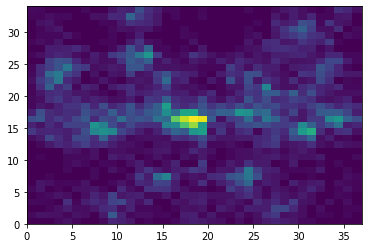

In [69]:
plt.pcolor(np.nanmean(BindAll[0],0))



array size 1564.94
array size 1564.94


c:\users\aratoj87\documents\github\pyeyesim\PyEyeSim\pyeyesim.py:657: RuntimeWarning: invalid value encountered in true_divide
  BindAll[cp][cs,:,:]/=np.sum(BindAll[cp][cs,:,:])


array size 1564.94
array size 1564.94
array size 1564.94
array size 1564.94
array size 1564.94
array size 1564.94
array size 1564.94
array size 1564.94
array size 1564.94
array size 1564.94
array size 1564.94
array size 1564.94


array([0.02140318, 0.02169449, 0.0215459 , 0.02206845, 0.02183026,
       0.02302463, 0.02161234, 0.02395255, 0.01666648, 0.02401628,
       0.02608942, 0.02128413, 0.01817245, 0.01988706])

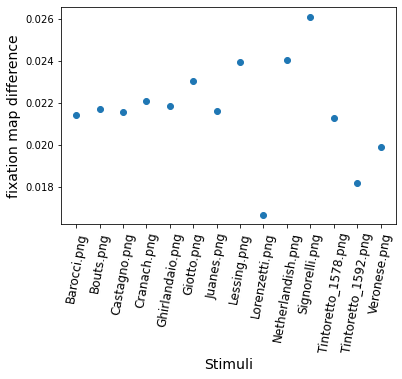

In [84]:
LastSupperDat.GetInddiff_v2(size=100,Vis=1)

1564.94

c:\users\aratoj87\documents\github\pyeyesim\PyEyeSim\pyeyesim.py:726: RuntimeWarning: divide by zero encountered in log2
  LogP=np.log2(StatP)


array([0.02503531, 0.02692374, 0.02864315, 0.02594919, 0.02969581,
       0.02996661, 0.02778144, 0.02935503, 0.02290568, 0.02887924,
       0.03130994, 0.027791  , 0.02423904, 0.02549906])

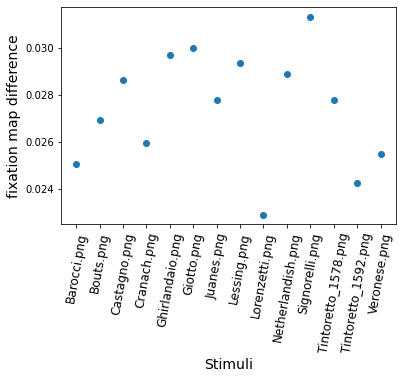

In [76]:
LastSupperDat.GetInddiff(nHor=10,nVer=10,Vis=1)